In [15]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

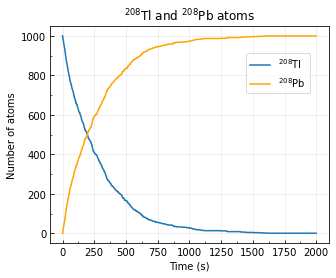

In [16]:
# variables
tau = 3.052*60
n0 = 1000
t = 0
nTl = []
nPb = []
time = np.arange(0, 2000, 1)

def p(t):
    '''Decay probability'''
    return 1-2**(-t/tau)

# n0 random numbers between 0 and 1
x = np.random.rand(n0)

# fill the list nTl and nPb using x and p(t)
for t in time:
    decay = len(x[x<p(t)])
    nTl.append(n0 - decay)
    nPb.append(decay)

# plot the results
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(time, nTl, color='#1f77b4', label='$^{208}$Tl')
ax.plot(time, nPb, color='orange', label='$^{208}$Pb')
ax.set_title('$^{208}$Tl and $^{208}$Pb atoms')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)
_ = ax.legend(framealpha = 0.7, bbox_to_anchor=(0.95,0.9))

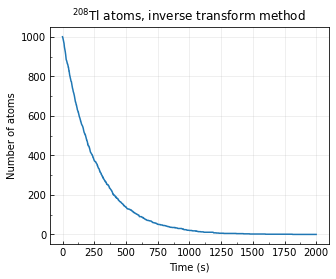

In [17]:
def expon_pdf(x, mu=np.log(2)/tau):
    """PDF of exponential distribution."""
    return mu * np.exp(-mu*x)

def expon_icdf(x, mu=np.log(2)/tau):
    """Inverse CDF of distribution - i.e. quantile function."""
    return -np.log(1-x)/mu

# n0 random rumbers and inverse distribution
x = np.random.rand(n0)
y = expon_icdf(x)

# empty list for the number of atoms
nTl = []

# fill the list nTl and nPb using v
for t in time:
    decay = len(y[y<t])
    nTl.append(n0 - decay)

# plot the result
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(time, nTl, color='#1f77b4')
ax.set_title('$^{208}$Tl atoms, inverse transform method')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Hit/miss method (100 iterations) = 1.3468 +- 0.0003
Mean value method = 1.3465 +- 0.0021

The compatibility coefficient between the two values of the integral is 0.16
The two values are compatible

The relative errors (error/value) for the two methods are:
Hit/miss: 0.0002
Mean value: 0.0015


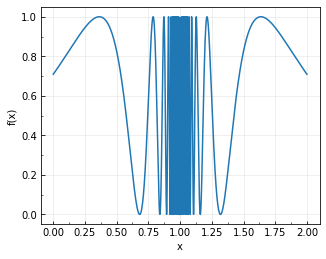

In [18]:
def f(x):
    '''Function f'''
    return (np.sin(1. / (1 - x)))**2

# plot f
xrange = np.linspace(0.001, 1.999, 10000)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xrange, f(xrange), color='#1f77b4')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', direction='in')
ax.grid(which='major', axis='both', alpha=0.25)

# Monte Carlo integration - 100 iterations
N = 100000
n = 100
I = []
for i in range(n):
    count = 0
    for i in range(N):
        x = 2 * np.random.random()
        y = np.random.random()
        if y < f(x): 
            count += 1
    I.append(2 * count/N)

# integral hit/miss as the mean and it's error
I_hm = np.mean(I)
std_dev = np.std(I)
err_I_hm = std_dev / np.sqrt(n)
print('Hit/miss method (100 iterations) = %.4f +- %.4f' %(I_hm, err_I_hm))

# mean value method
x = np.linspace(0.001, 1.999, N)
I_mv = 2 * np.sum(f(x)) / N
err_I_mv = 2 * np.sqrt( (np.sum(f(x)**2)/N - np.sum(f(x)/N)**2) / N)
print('Mean value method = %.4f +- %.4f' %(I_mv, err_I_mv))

# comparison with compatibility coefficient
k = np.abs(I_hm - I_mv) / np.sqrt(err_I_hm**2 + err_I_mv**2)
print('\nThe compatibility coefficient between the two values of the integral is %.2f' %k)
if k < 3:
    print('The two values are compatible')
else:
    print('The two values are not compatible')

print('\nThe relative errors (error/value) for the two methods are:')
print('Hit/miss: %.4f' %(err_I_hm/I_hm))
print('Mean value: %.4f' %(err_I_mv/I_mv))

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [19]:
def f(x):      
    '''Function f in a generic dimension'''            
    square_radius = np.sum(x**2, axis=0)      
    return np.array([1 if (r<=1) else 0 for r in square_radius]) 

# 2D case
N = 1000000
x = np.random.uniform(-1, 1, (2, N))
I_2D = 2**2 * np.sum(f(x)) / N
err_I_2D = 2 * np.sqrt( (np.sum(f(x)**2)/N - np.sum(f(x)/N)**2) / N )
print("2D case: %.4f +- %.4f (true value, %.5f)" % (I_2D, err_I_2D, np.pi))

# 10D case
x = np.random.uniform(-1, 1, (10, N))
I_10D = 2**10 * np.sum(f(x)) / N
err_I_10D = 2 * np.sqrt( (np.sum(f(x)**2)/N - np.sum(f(x)/N)**2) / N )
print("10D case: %.4f +- %.4f (true value, %.5f)" % (I_10D, err_I_10D, np.pi**5/np.math.factorial(5)))

2D case: 3.1395 +- 0.0008 (true value, 3.14159)
10D case: 2.5098 +- 0.0001 (true value, 2.55016)


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [20]:
def w(x):
    '''Function w'''
    return 1/(np.sqrt(x))

def f(x):
    '''Integrand'''
    return x**(-0.5)/(np.exp(x)+1)

N = 1000000

# integral
x = np.random.rand(N)**2
I = 2/N * np.sum(f(x) / w(x))
print("Integral = %.3f" %I)

Integral = 0.839
